## (WIP) Explorations 001 - Splines

In this notebook I explore working with cubic splines in python. I use the toy example of estimating a dog's path over an interval provided here - https://www.analytics-link.com/post/2018/08/17/creating-and-plotting-cubic-splines-in-python

The idea is to build some intuition on how splines can be used to increase the frequency of time series data.


### Setup

In [1]:
# common imports
import warnings
warnings.filterwarnings('ignore')
import os
import datetime
import time

# stats imports
import numpy as np
import pandas as pd
from scipy import interpolate

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
%matplotlib inline

### Toy Example - Dog Path

We replicate the example provided in the link above.

A dog is sniffing out a treat in the distance. At ten random points over the course of 60 seconds, the dog's collar emits a statistic showing how far away the dog is from the treat.

From this data, we want to estimate the path the dog took to get to the treat.

In [2]:
timestamp = (0,5,10,15,30,35,40,50,55,60)
distance = (100,90,65,85,70,30,40,45,20,0)
data = np.array((timestamp,distance))

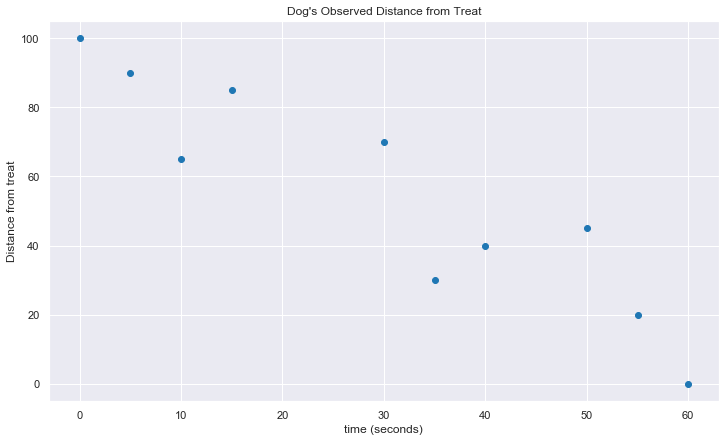

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(timestamp, distance, 'o')
plt.title("Dog's Observed Distance from Treat")
plt.xlabel("time (seconds)")
plt.ylabel("Distance from treat")
plt.show();

So now we have some observed data for ten "random" points, we want to estimate the path that the dog took.

In [4]:
tck, u = interpolate.splprep(data, s=0)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)

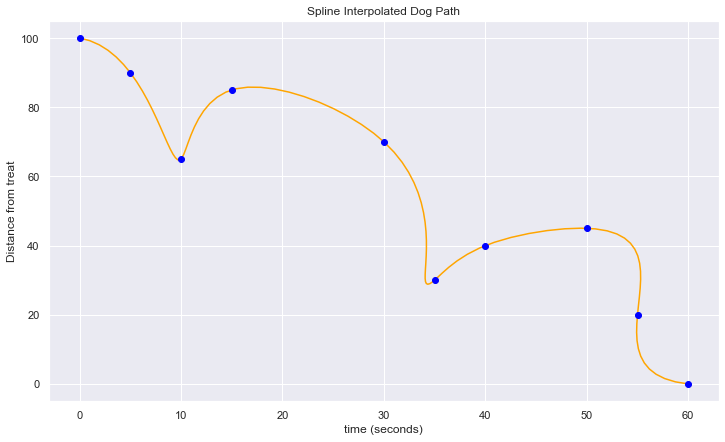

In [5]:
plt.figure(figsize=(12, 7))
plt.plot(out[0], out[1], color='orange')
plt.plot(data[0,:], data[1,:], 'ob')
plt.title("Spline Interpolated Dog Path")
plt.xlabel("time (seconds)")
plt.ylabel("Distance from treat")
plt.show()

The above now provides an estimation as to the path the dog took, and therefore alsoe the distance the dog was away from the treat at any pint in the 60 seconds.